# Pandas Plotting

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates, radviz

In [2]:
df = pd.read_csv("EPA_fuel_economy.csv")

In [3]:
df.head()

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19


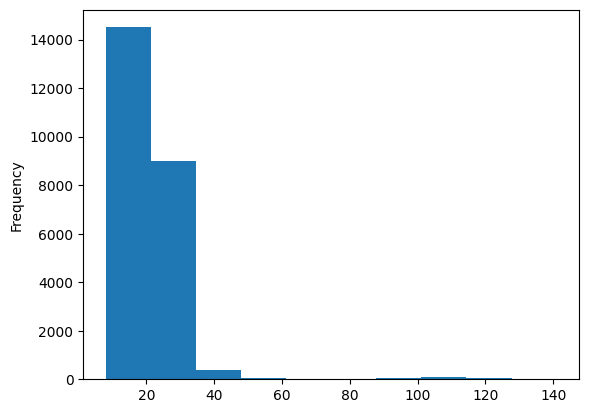

In [12]:
df['comb08'].plot(kind='hist');

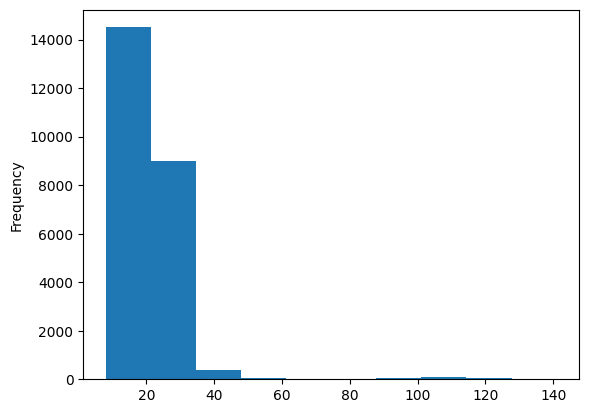

In [11]:
df['comb08'].plot.hist();

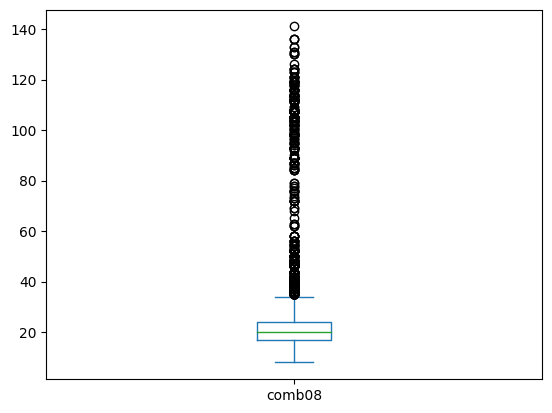

In [14]:
df['comb08'].plot(kind='box');

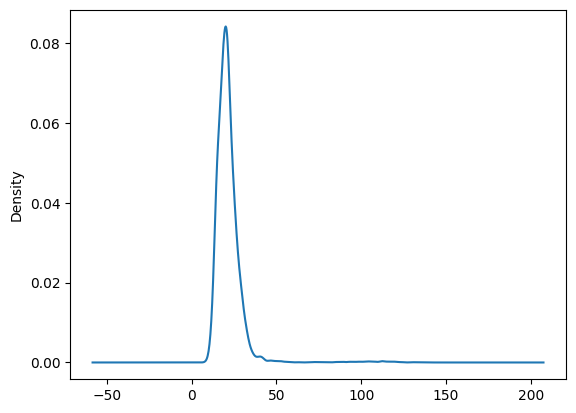

In [15]:
df['comb08'].plot(kind='density');

In [20]:
avg_by_year = df.groupby(['year']).agg({'highway08':'mean',
                                        'city08':'mean',
                                        'comb08':'mean'}).round(3)

In [21]:
avg_by_year

,highway08,city08,comb08
year,,,
2000,23.414,17.221,19.526
2001,23.328,17.276,19.480
2002,23.031,16.893,19.168
2003,22.836,16.781,19.001
2004,23.064,16.741,19.068
2005,23.298,16.852,19.194
2006,23.049,16.627,18.959
2007,23.083,16.606,18.979
2008,23.456,16.901,19.276


<AxesSubplot:title={'center':'Gas Mileage'}>

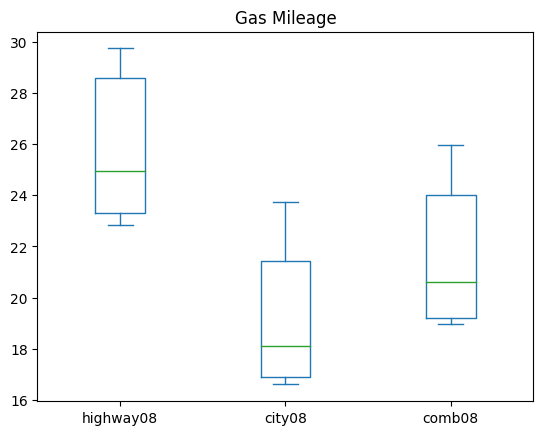

In [23]:
avg_by_year.plot(kind='box', title='Gas Mileage')

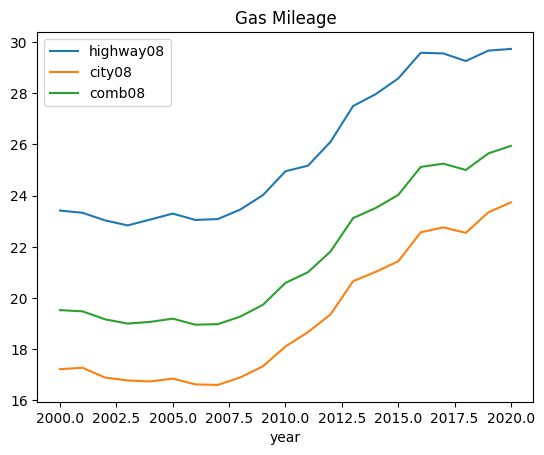

In [25]:
avg_by_year.plot(kind='line', title='Gas Mileage');

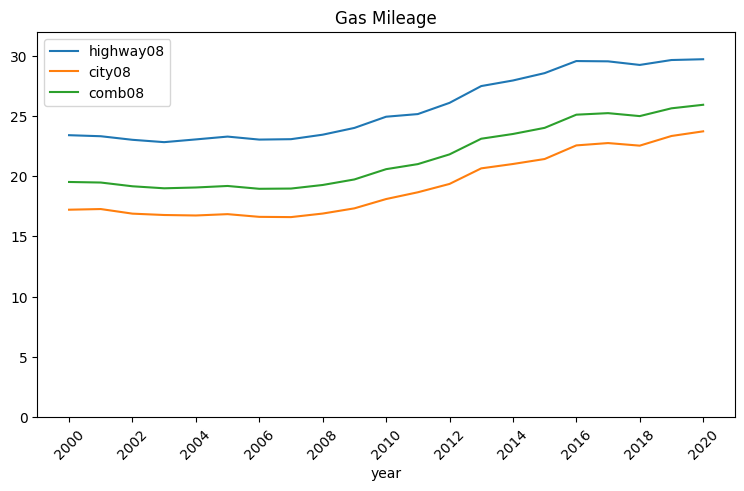

In [26]:
avg_by_year.plot(kind='line', title='Gas Mileage',
                 figsize=(9,5), rot = 45,
                 xticks=np.arange(2000,2022,2),
                 ylim=(0,32));

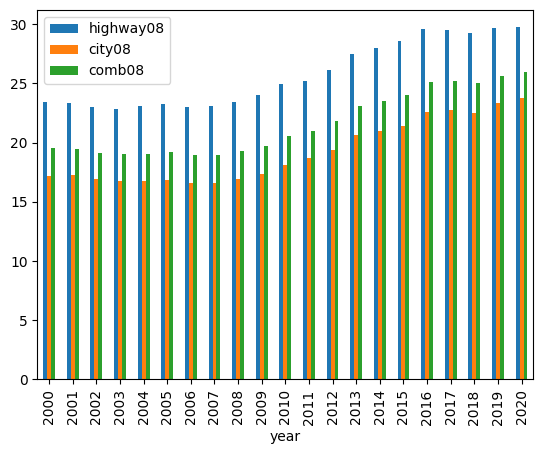

In [28]:
avg_by_year.plot(kind='bar');

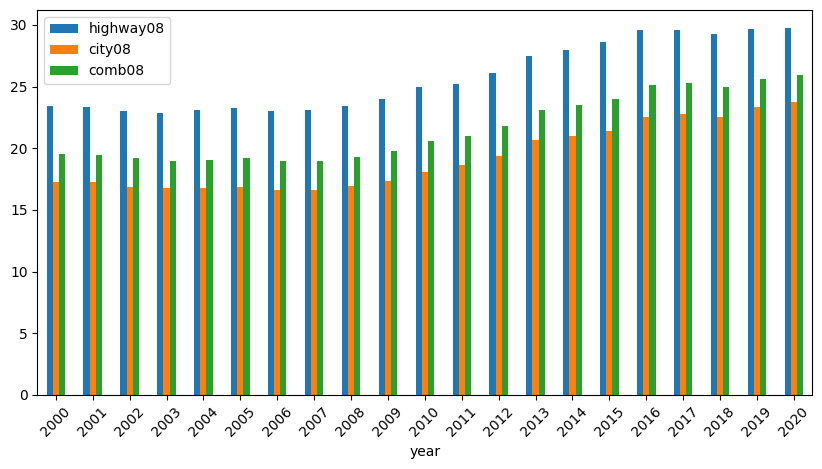

In [29]:
avg_by_year.plot(kind='bar', rot=45, figsize=(10,5));

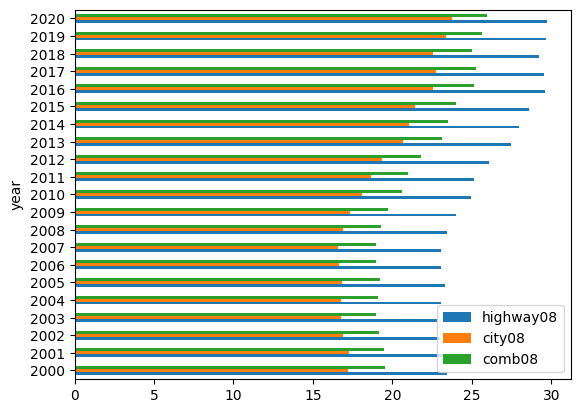

In [31]:
avg_by_year.plot(kind='barh');

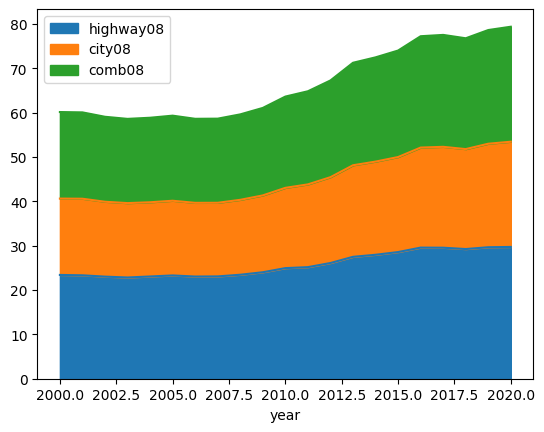

In [32]:
avg_by_year.plot(kind='area');

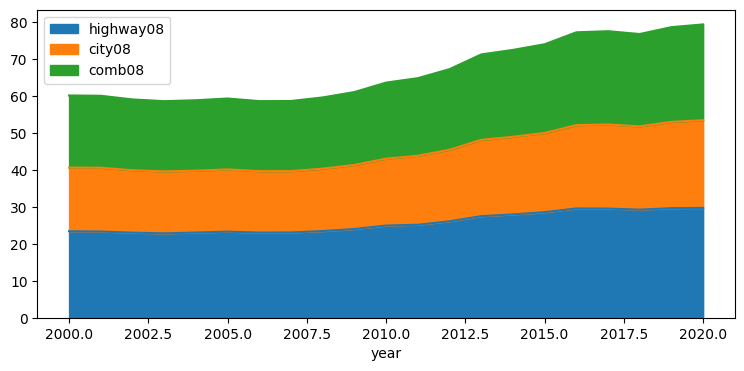

In [34]:
fig, ax = plt.subplots(figsize=(9,4))
avg_by_year.plot(kind='area', ax=ax);

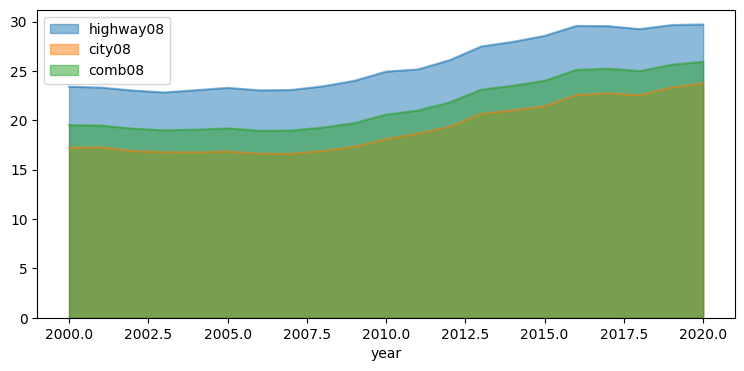

In [39]:
fig, ax = plt.subplots(figsize=(9,4))
avg_by_year.plot(kind='area', ax=ax, stacked=False);

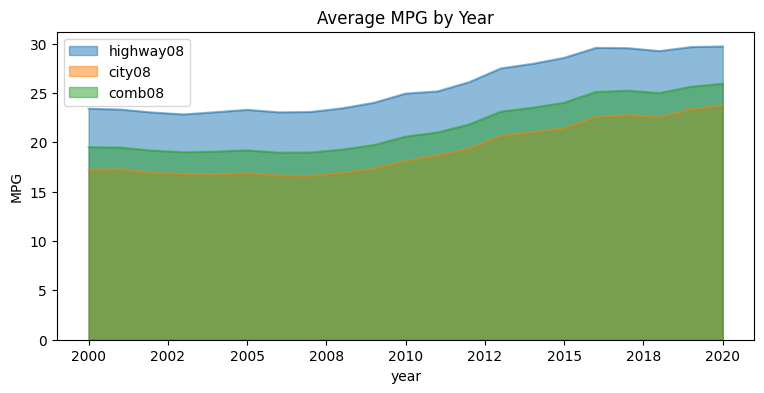

In [37]:
fig, ax = plt.subplots(figsize=(9,4))
avg_by_year.plot(kind='area', ax=ax, stacked=False)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:0.0f}'))
ax.set(ylabel='MPG', title='Average MPG by Year');

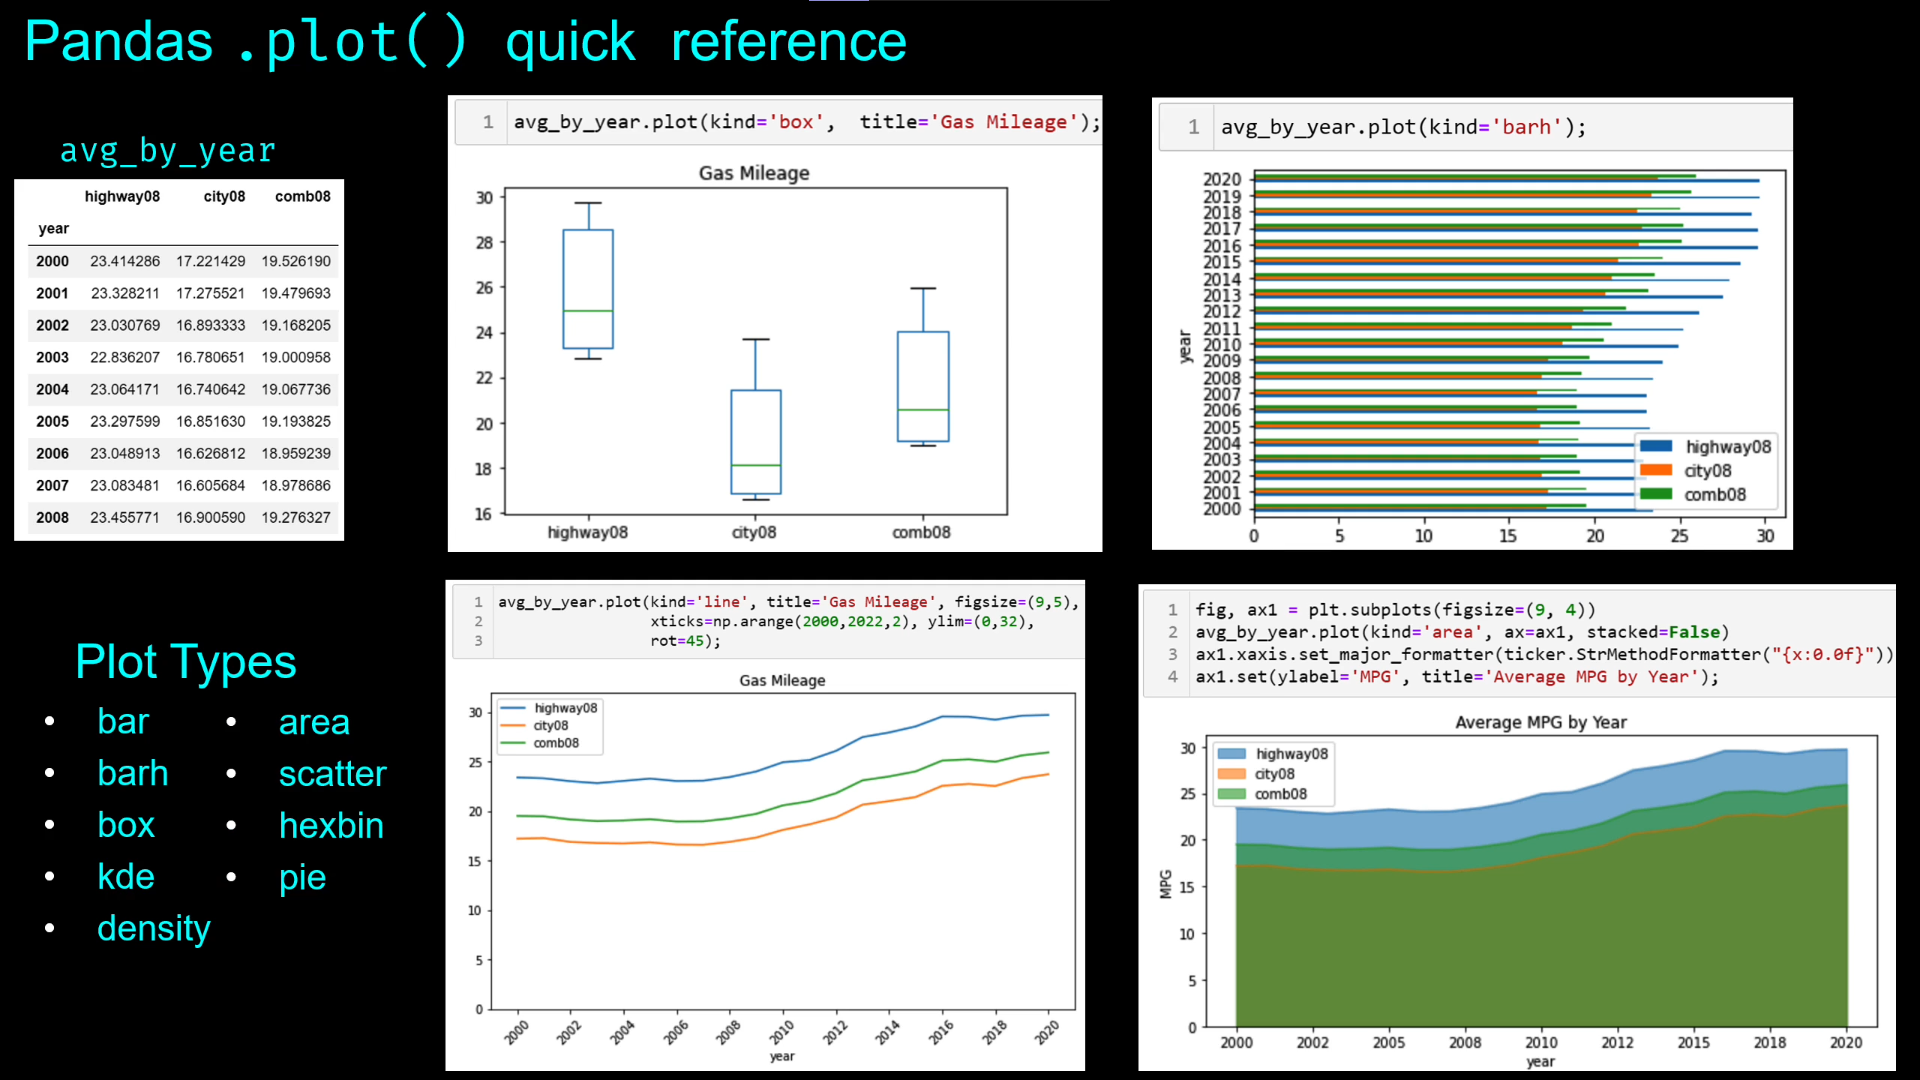

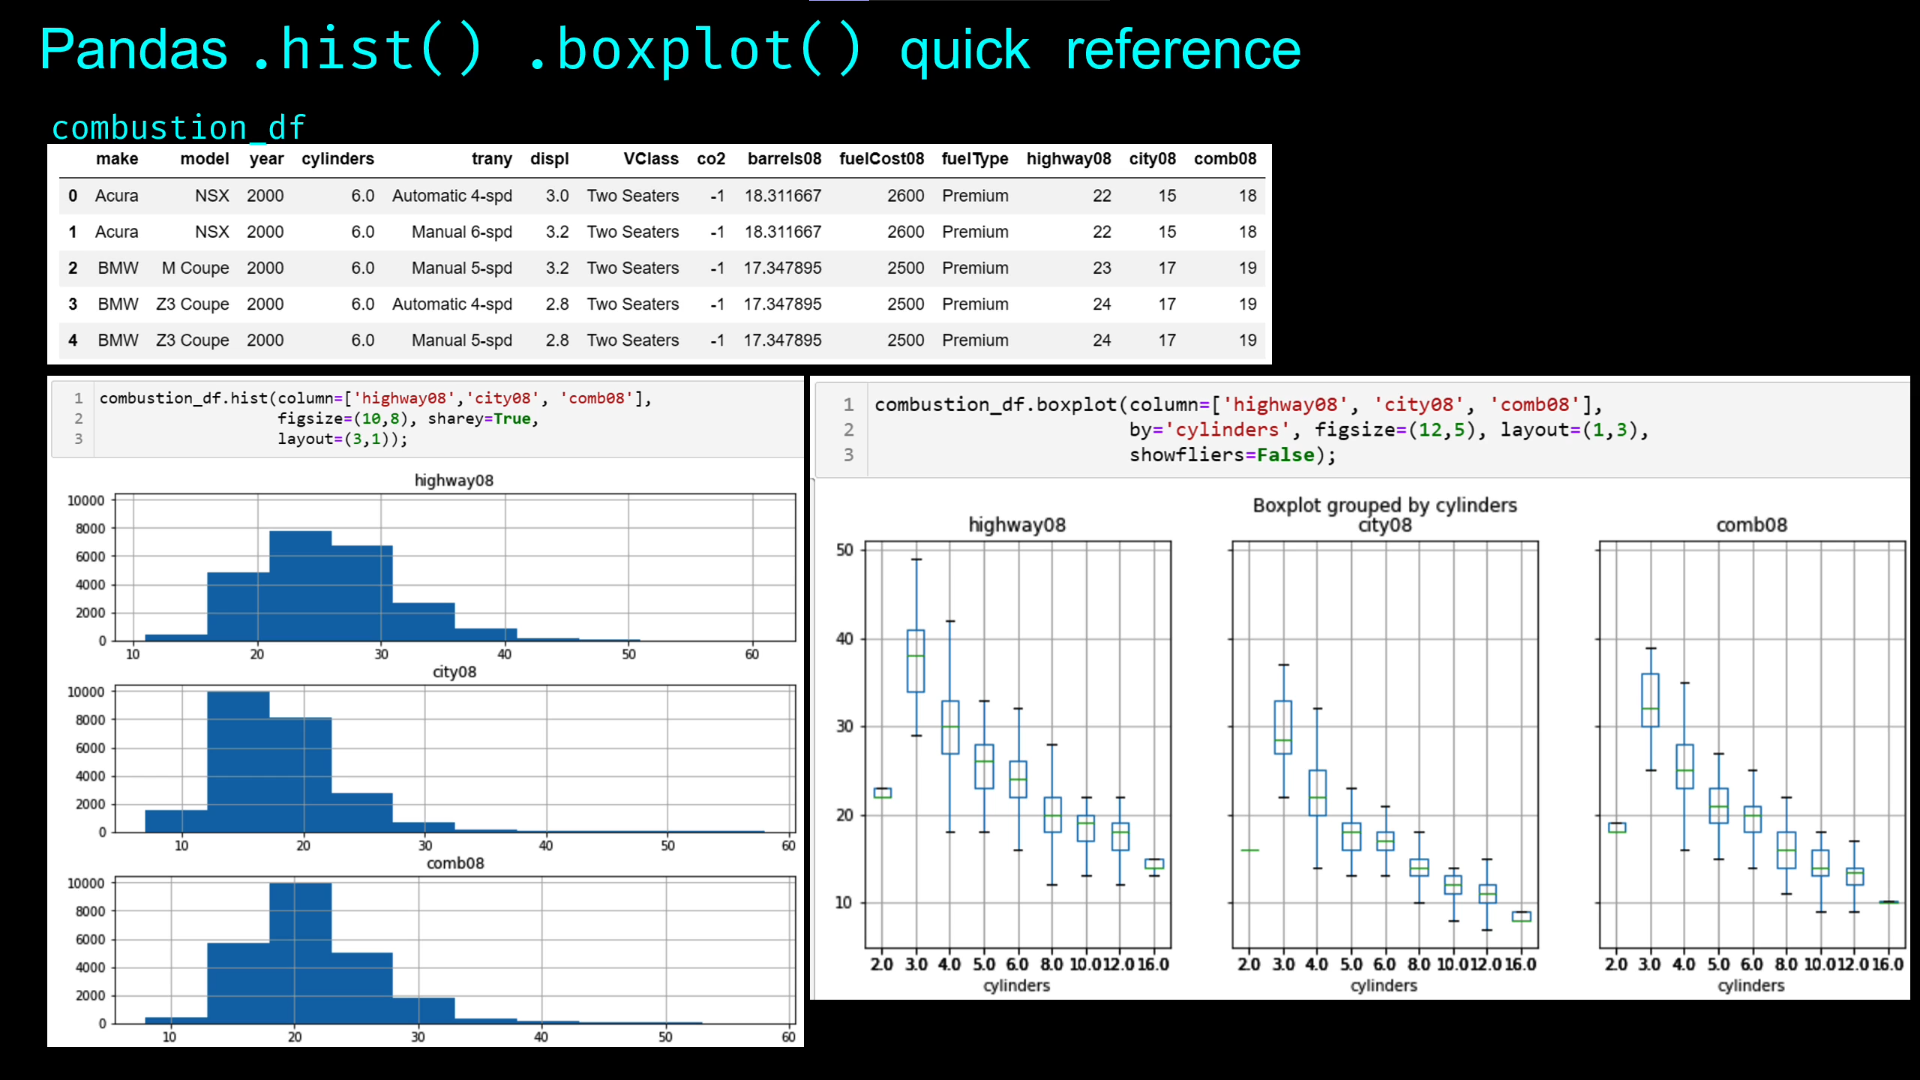

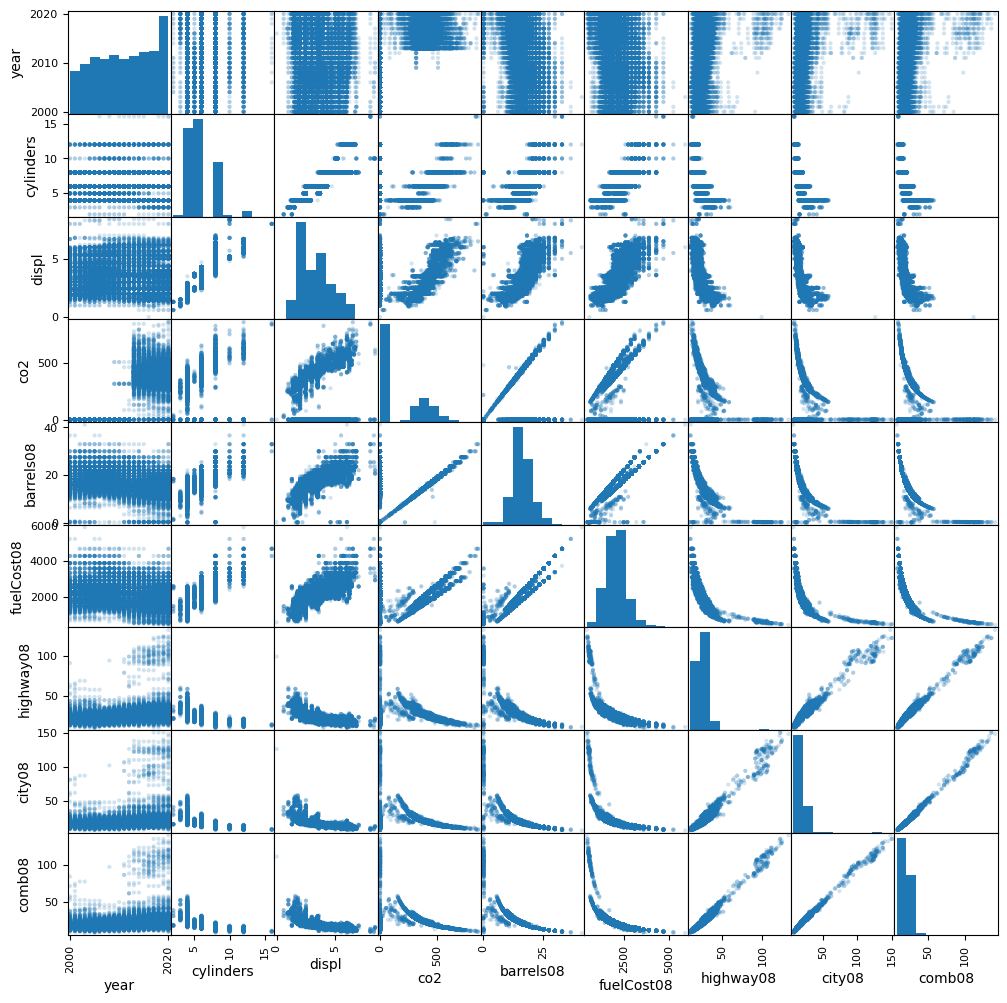

In [42]:
scatter_matrix(df, alpha=0.2, figsize=(12,12));

In [44]:
df['VClass'].value_counts()

Compact Cars                          3408
Midsize Cars                          3191
Subcompact Cars                       2182
Sport Utility Vehicle - 4WD           1987
Large Cars                            1692
Sport Utility Vehicle - 2WD           1556
Two Seaters                           1504
Minicompact Cars                      1056
Standard Pickup Trucks 2WD            1020
Small Sport Utility Vehicle 4WD        977
Small Station Wagons                   950
Standard Pickup Trucks 4WD             922
Standard Sport Utility Vehicle 4WD     776
Small Sport Utility Vehicle 2WD        664
Midsize Station Wagons                 400
Minivan - 2WD                          340
Small Pickup Trucks 2WD                314
Vans, Cargo Type                       312
Standard Sport Utility Vehicle 2WD     294
Vans, Passenger Type                   224
Small Pickup Trucks 4WD                207
Special Purpose Vehicle 2WD            149
Minivan - 4WD                           48
Special Pur

In [47]:
car_class=['Compact Cars', 'Midsize Cars', 'Subcompact Cars', 'Large Cars']
car_class_df = df[['cylinders','fuelCost08', 'co2', 'VClass']].query('VClass==@car_class').copy()

In [48]:
car_class_df

,cylinders,fuelCost08,co2,VClass
51,4.0,1650,-1,Subcompact Cars
52,4.0,1550,-1,Subcompact Cars
53,4.0,1950,-1,Subcompact Cars
54,8.0,3900,-1,Subcompact Cars
55,8.0,3900,-1,Subcompact Cars
...,...,...,...,...
24142,2.0,1500,22,Subcompact Cars
24145,8.0,3900,749,Midsize Cars
24148,NaN,950,0,Large Cars
24155,4.0,2050,382,Compact Cars


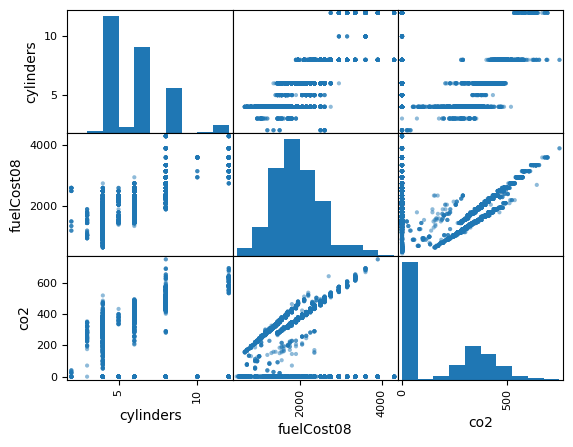

In [50]:
scatter_matrix(car_class_df);

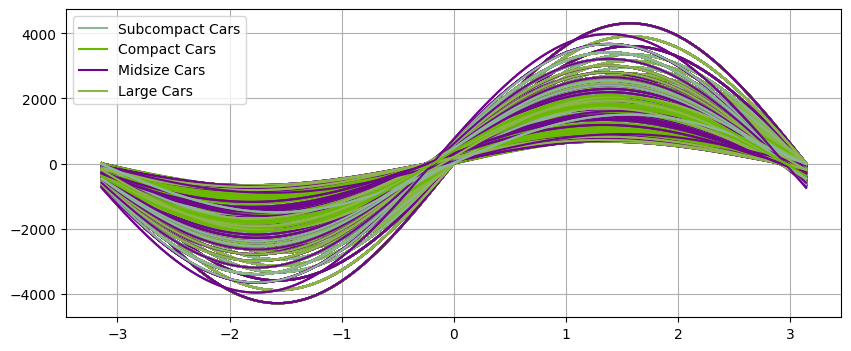

In [52]:
fig, ax = plt.subplots(figsize=(10,4))
andrews_curves(car_class_df, 'VClass', ax=ax)
ax.legend(loc='upper left');

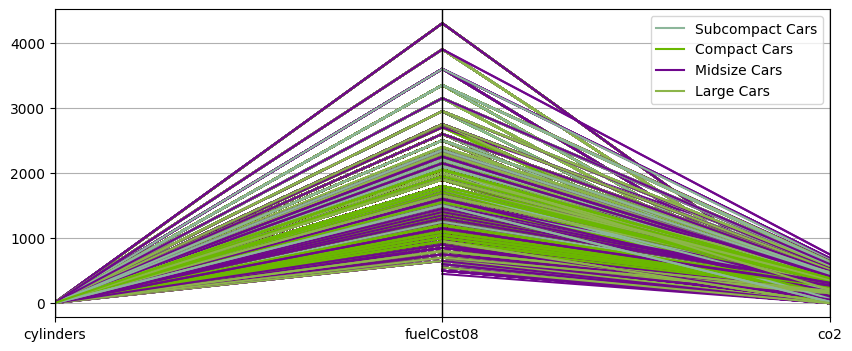

In [54]:
fig, ax1 = plt.subplots(figsize=(10,4))
parallel_coordinates(car_class_df, 'VClass', ax=ax1);

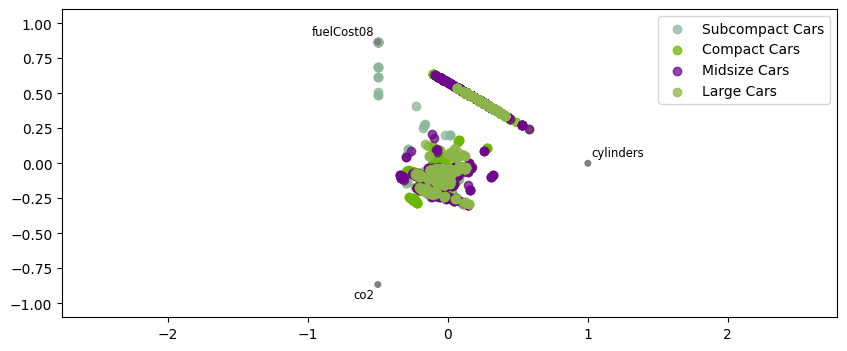

In [56]:
fig, ax1 = fig, ax1 = plt.subplots(figsize=(10,4))
radviz(car_class_df, 'VClass', ax=ax1, alpha=0.75);

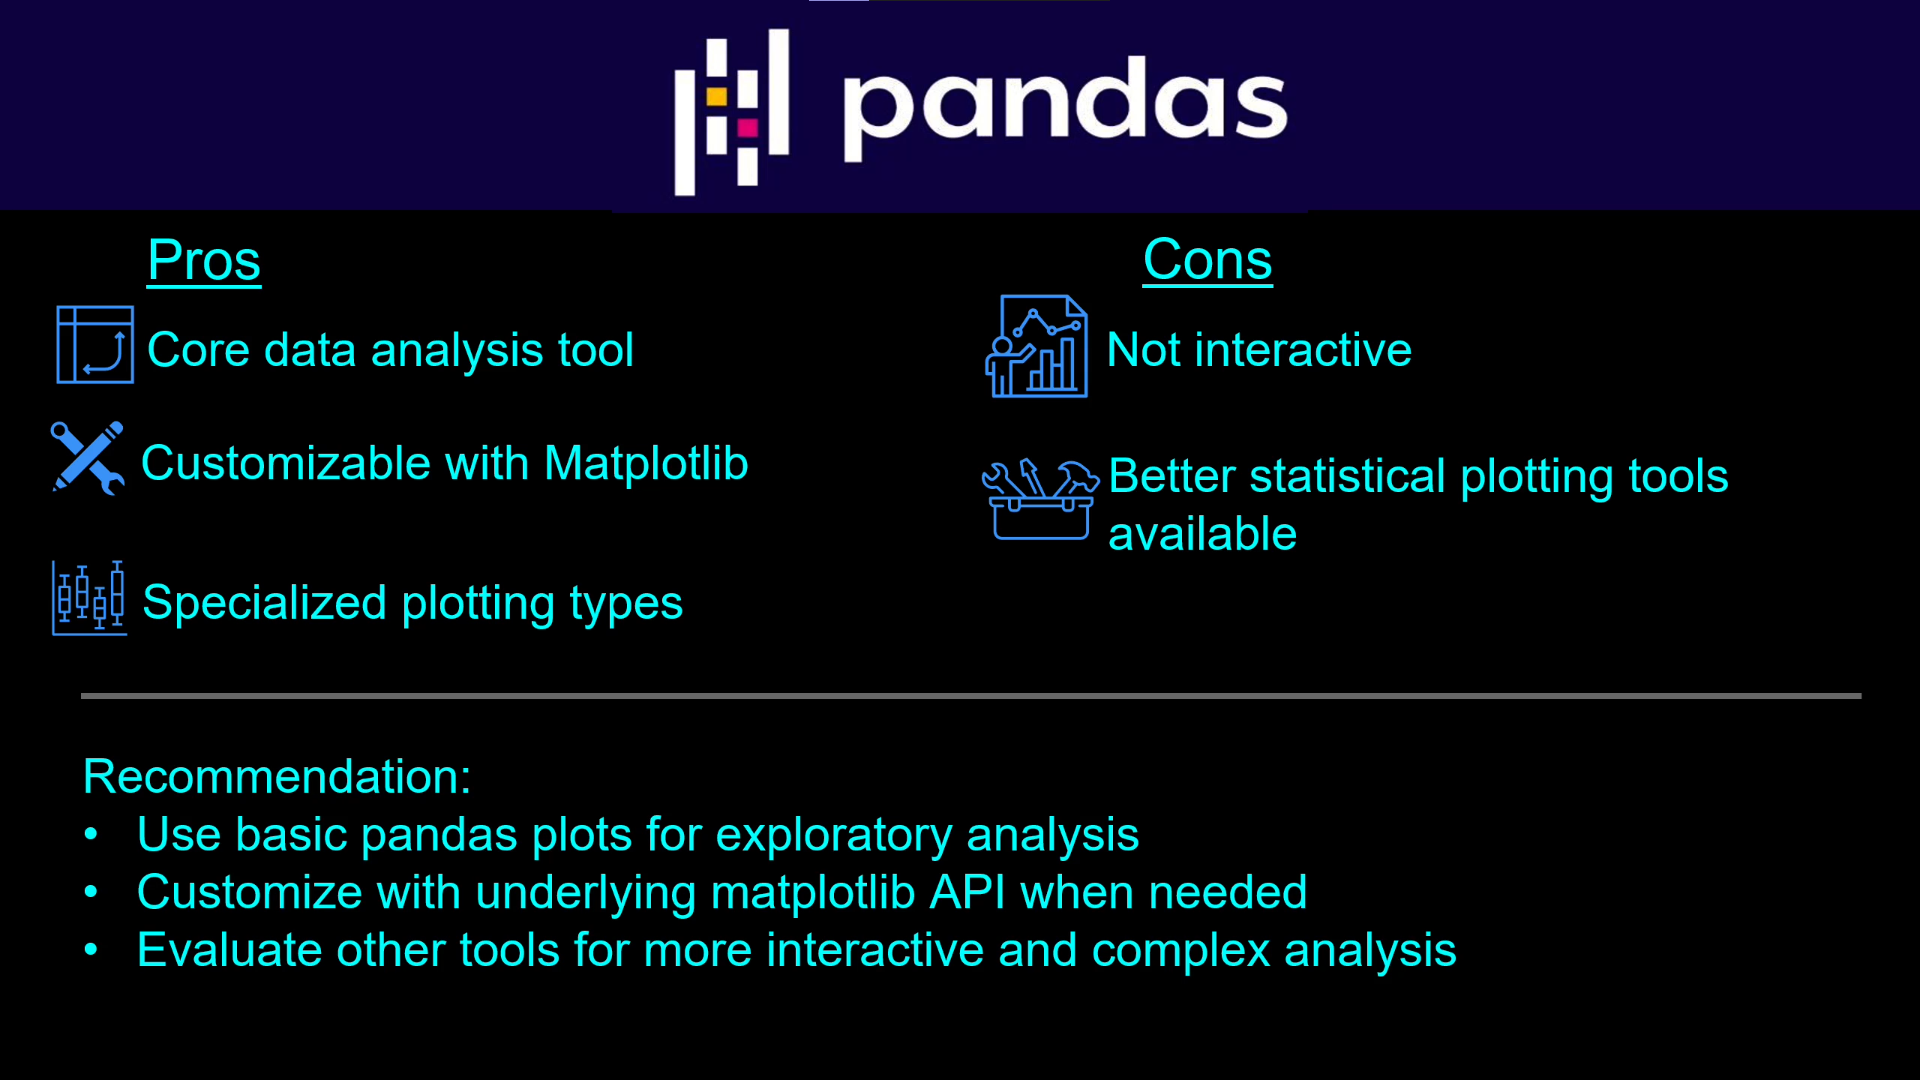